In [5]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc
import plotting_machine as pm

In [6]:
#--SETUP1: ---------------------------------------------------------------------------------
folder_name = "special_sweep"
VBs = np.linspace(-10, 10, 200) # np.linspace(-10,10, 200)
epsilons = np.linspace(-10, 10, 200) # np.linspace(-10, 10, 200)
lamdas = np.linspace(0, 0.3, 9)

In [7]:
#--SETUP2: ---------------------------------------------------------------------------------


T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

Is = []
I_vars = []
J_QHs = []
Ps = []
TURs = []
effs = []
sigmas = []

In [9]:
I_array = []
I_array_float = []
I_var_array = []
I_var_array_float = []
J_QH_array = []
J_QH_array_float = []
P_array = []
P_array_float = []
TUR_array_fixed = []
TUR_array_floating = []
eff_array = []
eff_array_float = []
sigma_array = []
sigma_array_float = []

min_epses = []
min_vbs = []

Epsilon, VB = np.meshgrid(epsilons, VBs)

#load serial case
data = np.load(f"{folder_name}/lamda0.0.npz")
I, I_var, P, J_QH, sigma, TUR_temp= data['I'], data['I_var'], data['P'], data['J_QH'], data['sigma'], data['TUR']
min_TUR = np.nanmin(TUR_temp)
print(min_TUR)
min_indices = np.argwhere(TUR_temp == min_TUR)
if len(min_indices) > 1:
    raise ValueError("More than one minimal value!")
min_x = min_indices[0][0]
min_y = min_indices[0][1]




1.9681027799317712


In [10]:

#Fixed point
for idx, lmda in enumerate(lamdas):
    data = np.load(f"{folder_name}/lamda{np.round(lmda, 3)}.npz")
    I, I_var, P, J_QH, eff, sigma, TUR = data['I'], data['I_var'], data['P'], data['J_QH'], data['eff'], data['sigma'], data['TUR']
    #print("Min TUR: ", TUR[min_x, min_y])
    #print(f"\tat: epsilon: {Epsilon[min_x, min_y]} and VB: {VB[min_x, min_y]}")
    #print("\t Power here: ", P[min_x, min_y])
    I_array.append(I[min_x, min_y])
    I_var_array.append(I_var[min_x, min_y])
    J_QH_array.append(J_QH[min_x, min_y])
    P_array.append(P[min_x, min_y])
    TUR_array_fixed.append(TUR[min_x, min_y])
    eff_array.append(eff[min_x, min_y])
    sigma_array.append(sigma[min_x, min_y])




In [11]:
'''
#Allways choosing the point with minimal TUR value
for idx, lmda in enumerate(lamdas):
    TUR = TURs[idx]
    min_TUR = np.nanmin(TUR)
    min_indices = np.argwhere(TUR == min_TUR)
    if len(min_indices) > 1:
        raise ValueError("More than one minimal value!")
    min_x = min_indices[0][0]
    min_y = min_indices[0][1]
    I_array_float.append(I[min_x, min_y])
    I_var_array_float.append(I_var[min_x, min_y])
    J_QH_array_float.append(J_QH[min_x, min_y])
    P_array_float.append(P[min_x, min_y])
    TUR_array_floating.append(min_TUR)
    eff_array_float.append(eff[min_x, min_y])
    sigma_array_float.append(sigma[min_x, min_y])
    min_epses.append(Epsilon[min_x, min_y])
    min_vbs.append(VB[min_x, min_y])
'''

'\n#Allways choosing the point with minimal TUR value\nfor idx, lmda in enumerate(lamdas):\n    TUR = TURs[idx]\n    min_TUR = np.nanmin(TUR)\n    min_indices = np.argwhere(TUR == min_TUR)\n    if len(min_indices) > 1:\n        raise ValueError("More than one minimal value!")\n    min_x = min_indices[0][0]\n    min_y = min_indices[0][1]\n    I_array_float.append(I[min_x, min_y])\n    I_var_array_float.append(I_var[min_x, min_y])\n    J_QH_array_float.append(J_QH[min_x, min_y])\n    P_array_float.append(P[min_x, min_y])\n    TUR_array_floating.append(min_TUR)\n    eff_array_float.append(eff[min_x, min_y])\n    sigma_array_float.append(sigma[min_x, min_y])\n    min_epses.append(Epsilon[min_x, min_y])\n    min_vbs.append(VB[min_x, min_y])\n'

In [12]:
print(TURs.shape)
print(np.nanmin(TURs))

AttributeError: 'list' object has no attribute 'shape'

[0.     0.0375 0.075  0.1125 0.15   0.1875 0.225  0.2625 0.3   ]


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

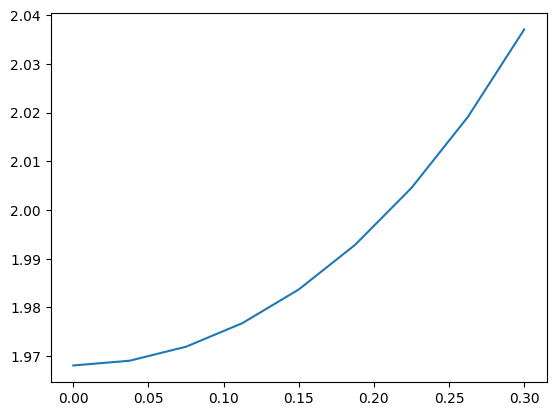

In [13]:
print(lamdas)
plt.plot(lamdas, TUR_array_fixed, label='Minimal TUR, keeping point fixed')
plt.plot(lamdas, TUR_array_floating, label='Minimal TUR, allways choosing smallest value')
plt.scatter(lamdas, TUR_array_fixed)
plt.scatter(lamdas, TUR_array_floating)
plt.title("Difference between picking lowest TUR point and keeping point fixed")
plt.axhline(y=2, linestyle=':')
plt.ylabel(r"$\Phi$")
plt.xlabel(r'$\lambda$')
plt.ylim(1.9664, 2.05)
plt.legend()
plt.show()


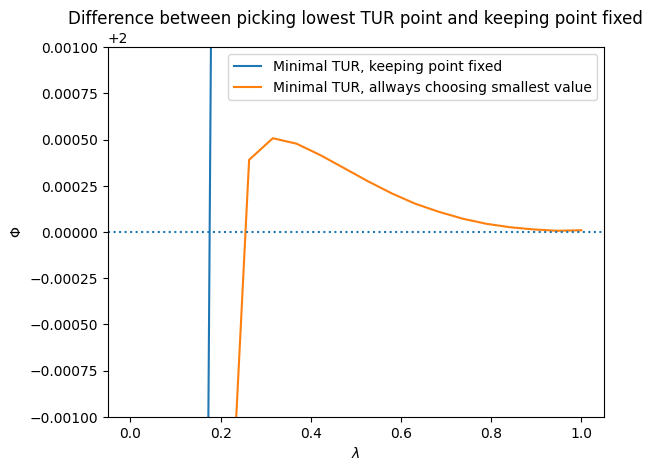

In [9]:
plt.plot(lamdas, TUR_array_fixed, label='Minimal TUR, keeping point fixed')
plt.plot(lamdas, TUR_array_floating, label='Minimal TUR, allways choosing smallest value')
plt.title("Difference between picking lowest TUR point and keeping point fixed")
plt.axhline(y=2, linestyle=':')
plt.ylabel(r"$\Phi$")
plt.xlabel(r'$\lambda$')
plt.ylim(1.999, 2.001)
plt.legend()
plt.show()

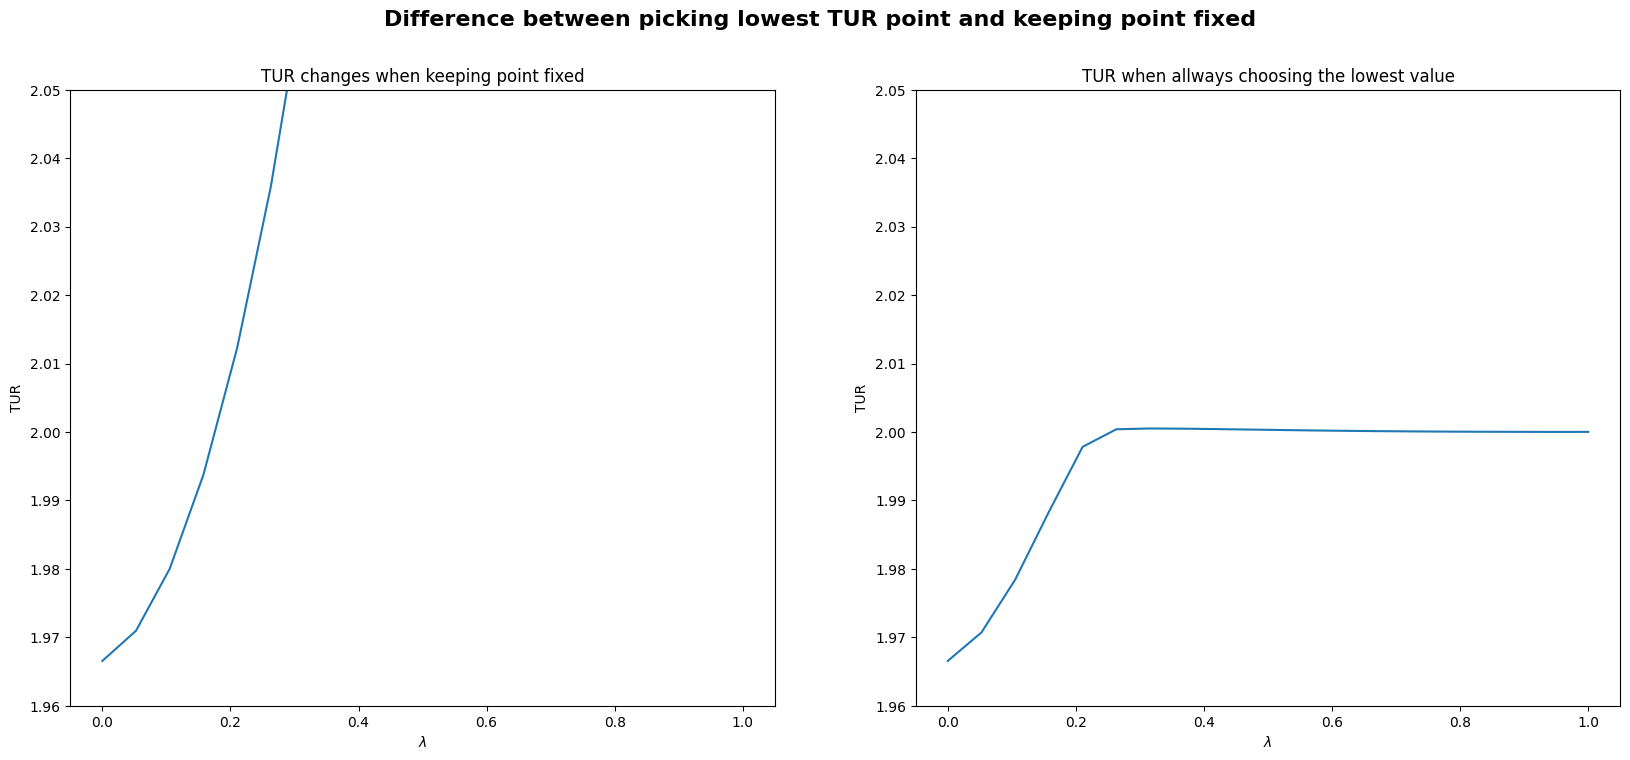

In [10]:
"ys should be list/tuple with two entrys and y_names containes the corresponding names"
importlib.reload(pm)
pm.plot_two(lamdas, r"$\lambda$", (TUR_array_fixed, TUR_array_floating),
            ("TUR", "TUR"),
             ("TUR changes when keeping point fixed", "TUR when allways choosing the lowest value"),
               "Difference between picking lowest TUR point and keeping point fixed")

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


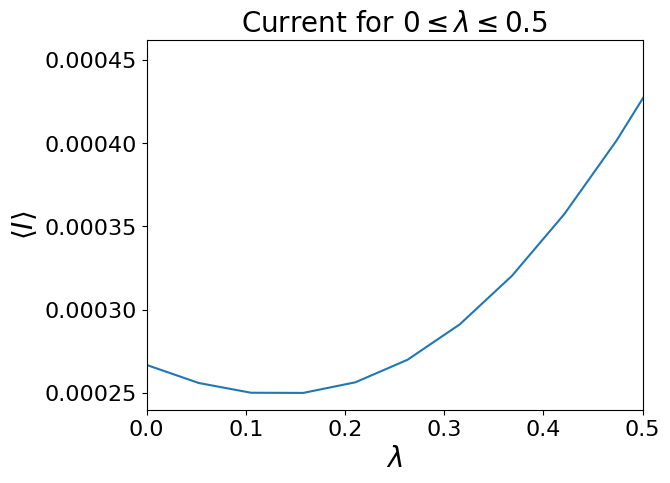

In [20]:

plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], I_array[0:11])
plt.title(r'Current for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\langle I \rangle$', fontsize=font_size)
plt.xlim(0,0.5)
#plt.scatter(0.95, 0.0006)

print(lamdas)

(0.0, 0.5)

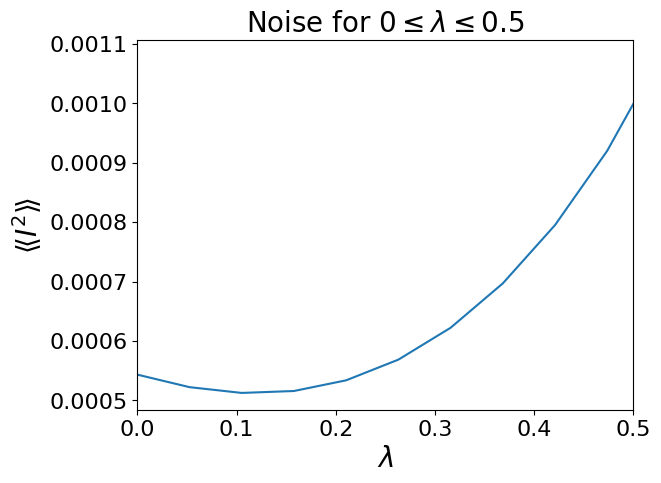

In [19]:
plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], I_var_array[0:11])
plt.title(r'Noise for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\langle\!\langle I^2 \rangle\!\rangle$', fontsize=font_size)
plt.xlim(0,0.5)

(0.0, 0.5)

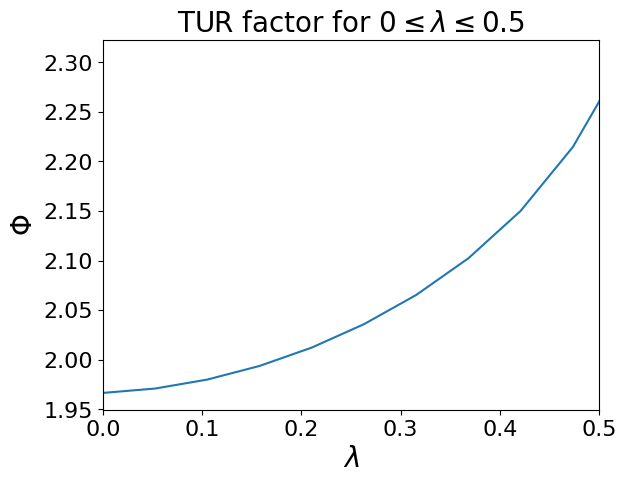

In [18]:
plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], TUR_array_fixed[0:11])
plt.title(r'TUR factor for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\Phi$', fontsize=font_size)
plt.xlim(0,0.5)

(0.0, 0.5)

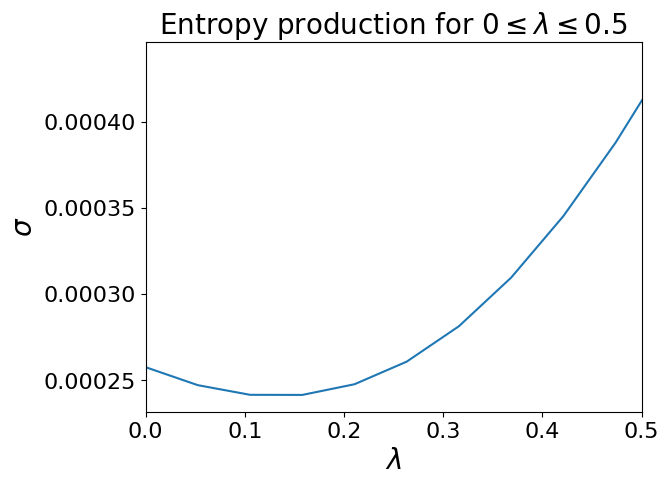

In [14]:
plt.figure()
font_size = 20
plt.rcParams.update({'font.size': 16})  # Applies globally
plt.plot(lamdas[0:11], sigma_array[0:11])
plt.title(r'Entropy production for $0 \leq \lambda \leq 0.5$', fontsize=font_size)
plt.xlabel(r'$\lambda$', fontsize=font_size)
plt.ylabel(r'$\sigma$', fontsize=font_size)
plt.xlim(0,0.5)

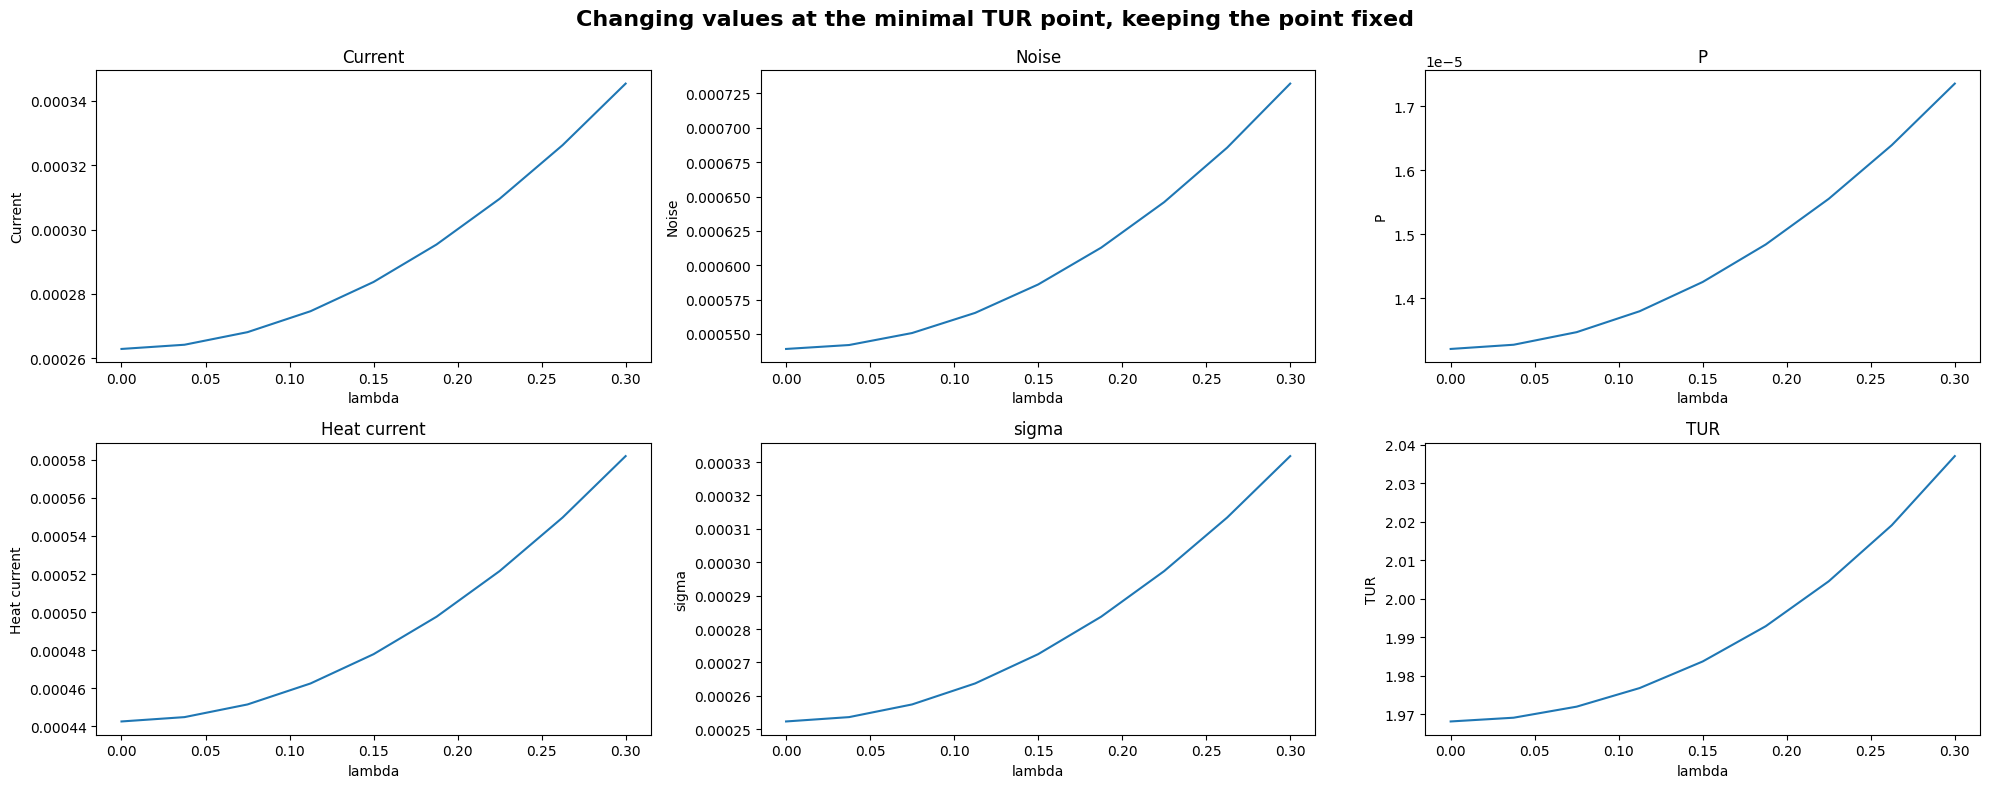

In [14]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array, I_var_array, P_array, J_QH_array, sigma_array, TUR_array_fixed,
               "Changing values at the minimal TUR point, keeping the point fixed")

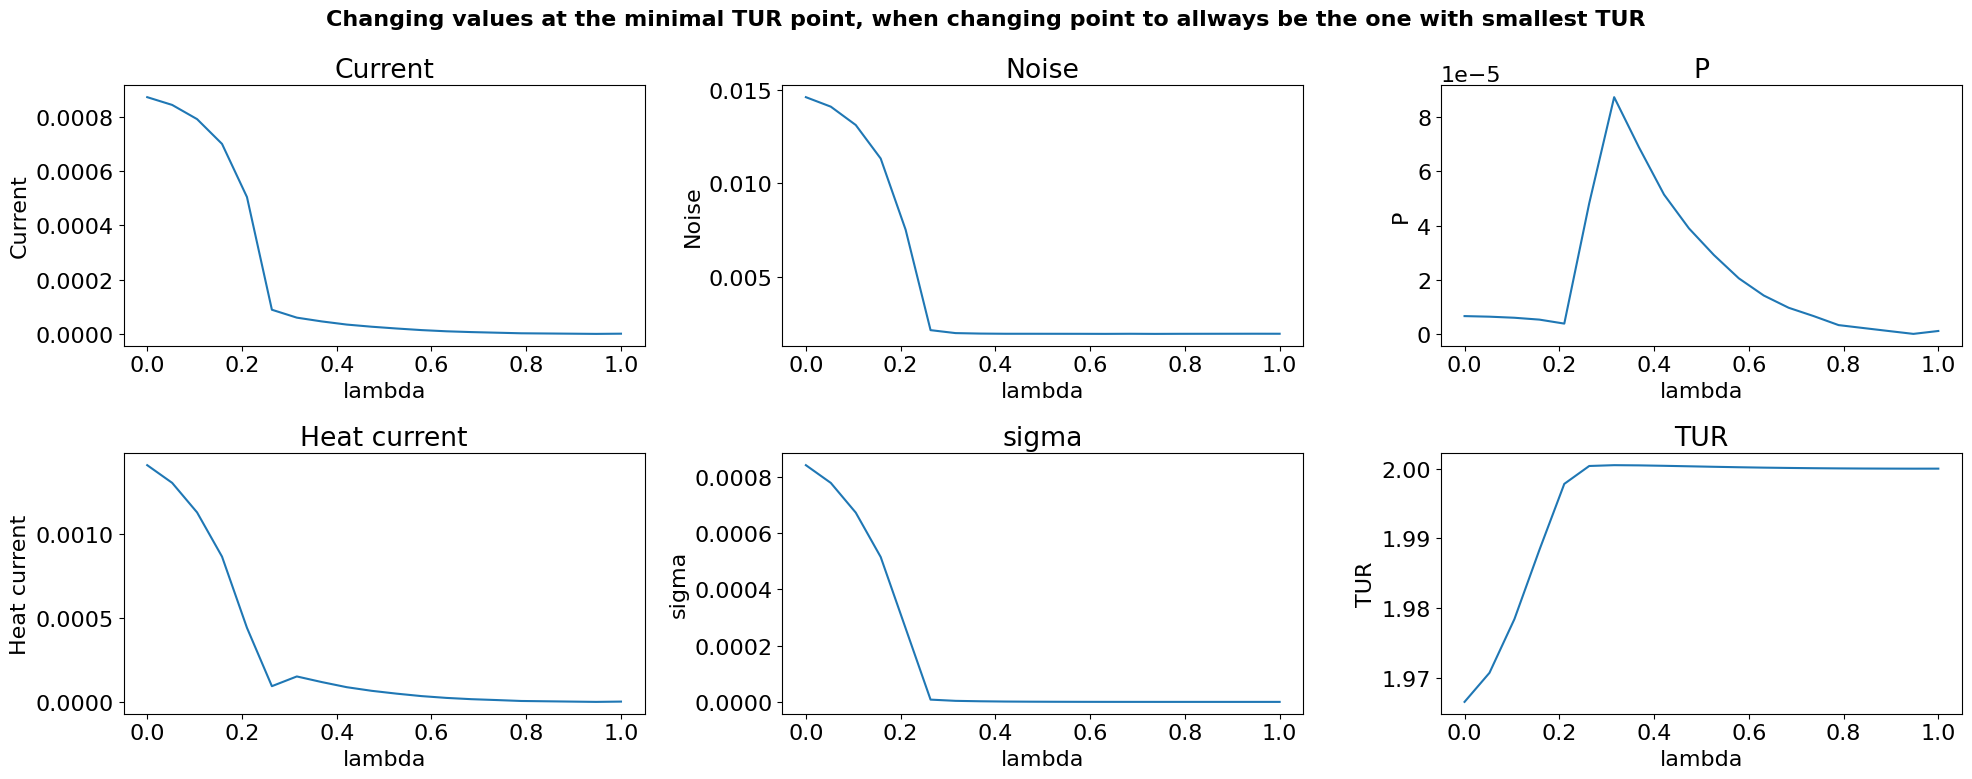

In [16]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array_float, I_var_array_float, P_array_float, J_QH_array_float, sigma_array_float, TUR_array_floating,
               "Changing values at the minimal TUR point, when changing point to allways be the one with smallest TUR")

eps [np.float64(1.8090452261306533), np.float64(1.829145728643216), np.float64(1.8090452261306533), np.float64(1.7688442211055277), np.float64(1.7487437185929648), np.float64(1.7386934673366834), np.float64(1.7487437185929648), np.float64(1.7085427135678393), np.float64(1.7487437185929648), np.float64(1.7185929648241207), np.float64(1.7085427135678393), np.float64(1.6984924623115578), np.float64(1.6884422110552764), np.float64(1.6984924623115578)]
vb [np.float64(1.4623115577889447), np.float64(1.5), np.float64(1.5), np.float64(1.4773869346733668), np.float64(1.4698492462311556), np.float64(1.4698492462311556), np.float64(1.484924623115578), np.float64(1.4547738693467336), np.float64(1.4924623115577889), np.float64(1.4698492462311556), np.float64(1.4623115577889447), np.float64(1.4547738693467336), np.float64(1.4472361809045227), np.float64(1.4547738693467336)]


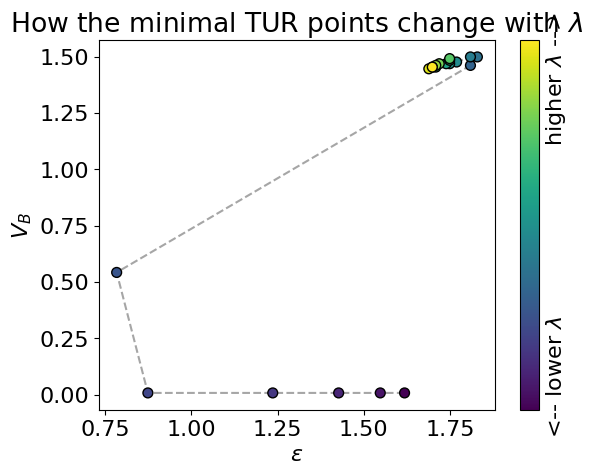

In [17]:
print('eps',min_epses[6:])
print('vb', min_vbs[6:])
importlib.reload(pm)
pm.plot_minimal_TUR_points(min_epses, min_vbs)
